# Importação das bases de dados

Vamos começar com a importação das bibliotecas que vamos utilizar ao longo do notebook e também das bases de dados fornecidas pela Decision

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from collections import Counter
import xgboost as xgb

In [173]:
# Código para extração dos dados completos dos arquivos json

df_applicants = pd.read_json("bases/applicants.json", orient='index')

with open("bases/applicants.json", 'r', encoding='utf-8') as f:
    data = json.load(f)

applicant_ids = []
for applicant_id, applicant_data in data.items():
    applicant_data['applicant_id'] = applicant_id
    applicant_ids.append(applicant_data)

ids = pd.DataFrame(applicant_ids)
ids = ids[['applicant_id']]
infos_basicas = pd.json_normalize(df_applicants['infos_basicas'])
informacoes_pessoais = pd.json_normalize(df_applicants['informacoes_pessoais'])
informacoes_profissionais = pd.json_normalize(df_applicants['informacoes_profissionais'])
formacao_e_idiomas = pd.json_normalize(df_applicants['formacao_e_idiomas'])
cargo_atual = pd.json_normalize(df_applicants['cargo_atual'])
cv_data = df_applicants[['cv_pt', 'cv_en']]

df_applicants = pd.concat([ids, infos_basicas, informacoes_pessoais, informacoes_profissionais, formacao_e_idiomas, cargo_atual, cv_data], axis=1)

df_applicants.head()

,applicant_id,telefone_recado,telefone,objetivo_profissional,data_criacao,inserido_por,email,local,sabendo_de_nos_por,data_atualizacao,...,cargo_atual,projeto_atual,cliente,unidade,data_admissao,data_ultima_promocao,nome_superior_imediato,email_superior_imediato,cv_pt,cv_en
0,31000,,(11) 97048-2708,,10-11-2021 07:29:49,Luna Correia,carolina_aparecida@gmail.com,,,10-11-2021 07:29:49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
1,31001,,(11) 93723-4396,Analista Administrativo,10-11-2021 08:56:16,Laura Pacheco,eduardo_rios@hotmail.com,"São Paulo, São Paulo",Outros,11-11-2021 11:10:31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"\nexperiência em análise, desenvolvimento e im...",
2,31002,,(11) 92399-9824,Administrativo | Financeiro,10-11-2021 09:01:00,Laura Pacheco,pedro_henrique_carvalho@gmail.com,"São Paulo, São Paulo",Anúncio,10-11-2021 11:42:36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\n,
3,31003,,(11) 98100-1727,Área administrativa,10-11-2021 09:08:13,Laura Pacheco,thiago_barbosa@hotmail.com,"São Paulo, São Paulo",Site de Empregos,10-11-2021 16:04:51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\n,
4,31004,,(11) 92517-2678,,10-11-2021 09:18:46,Maria Clara Pires,diogo_das_neves@hotmail.com,,,10-11-2021 09:22:03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,


In [174]:
df_applicants.tail()

,applicant_id,telefone_recado,telefone,objetivo_profissional,data_criacao,inserido_por,email,local,sabendo_de_nos_por,data_atualizacao,...,cargo_atual,projeto_atual,cliente,unidade,data_admissao,data_ultima_promocao,nome_superior_imediato,email_superior_imediato,cv_pt,cv_en
43056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"analista desenvolvedor java\nassis, são paulo\...",
43057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,escolaridade : superior completo idade : 44 an...,
43058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\n\n\ncontact\nmauricio.souza1976@gmail.co ...,
43059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"\n07/02/1993, guarulhos – sp\n\nresumo profiss...",
43060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\njardim marisa – são paulo – sp\n\n\nsantos-m...,


In [175]:
df_applicants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44386 entries, 0 to 43060
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   applicant_id                 42482 non-null  object
 1   telefone_recado              42482 non-null  object
 2   telefone                     42482 non-null  object
 3   objetivo_profissional        42482 non-null  object
 4   data_criacao                 42482 non-null  object
 5   inserido_por                 42482 non-null  object
 6   email                        42482 non-null  object
 7   local                        42482 non-null  object
 8   sabendo_de_nos_por           42482 non-null  object
 9   data_atualizacao             42482 non-null  object
 10  codigo_profissional          42482 non-null  object
 11  nome                         42482 non-null  object
 12  data_aceite                  42482 non-null  object
 13  nome                         42482 n

In [176]:
df_applicants.isnull().sum()

applicant_id                    1904
telefone_recado                 1904
telefone                        1904
objetivo_profissional           1904
data_criacao                    1904
inserido_por                    1904
email                           1904
local                           1904
sabendo_de_nos_por              1904
data_atualizacao                1904
codigo_profissional             1904
nome                            1904
data_aceite                     1904
nome                            1904
cpf                             1904
fonte_indicacao                 1904
email                           1904
email_secundario                1904
data_nascimento                 1904
telefone_celular                1904
telefone_recado                 1904
sexo                            1904
estado_civil                    1904
pcd                             1904
endereco                        1904
skype                           1904
url_linkedin                    1904
f

Podemos ver que na base applicants temos todas os dados referentes ao candidato: Informações pessoais, profissionais, formação e o cv.

Além disso todas as colunas estão configuradas como object e temos diversos valores nulos que vão precisar ser tratados.

In [177]:
df_vagas = pd.read_json('bases/vagas.json', orient='index')

with open("bases/vagas.json", 'r', encoding='utf-8') as f:
    data = json.load(f)

vagas_ids = []
for vagas_id, vagas_data in data.items():
    vagas_data['vagas_id'] = vagas_id
    vagas_ids.append(vagas_data)

ids = pd.DataFrame(vagas_ids)
ids = ids[['vagas_id']]
df_info_basicas = pd.json_normalize(df_vagas['informacoes_basicas'])
df_perfil_vaga = pd.json_normalize(df_vagas['perfil_vaga'])
df_beneficios = pd.json_normalize(df_vagas['beneficios'])

df_vagas = pd.concat([ids, df_info_basicas, df_perfil_vaga, df_beneficios], axis=1)

df_vagas.head()

,vagas_id,data_requicisao,limite_esperado_para_contratacao,titulo_vaga,vaga_sap,cliente,solicitante_cliente,empresa_divisao,requisitante,analista_responsavel,...,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,demais_observacoes,viagens_requeridas,equipamentos_necessarios,habilidades_comportamentais_necessarias,valor_venda,valor_compra_1,valor_compra_2
0,5185,04-05-2021,00-00-0000,Operation Lead -,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Srta. Bella Ferreira,...,TI - Sistemas e Ferramentas-,Operations Lead\n\nRoles & Responsibilities:\n...,Required Skills:\n• Prior experience in Cloud ...,100% Remoto Período – entre 5 – 6 meses,,Nenhum -,NaN,-,R$,
1,5184,04-05-2021,00-00-0000,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Yasmin da Rosa,...,TI - Desenvolvimento/Programação-,Consultor PP/QM Sr.\n\n• Consultor PP/QM Sênio...,• Consultor PP/QM Sênior com experiencia em pr...,• Início: Imediato • Fim: Jan/22,,Nenhum -,NaN,-,R$,
2,5183,04-05-2021,00-00-0000,ANALISTA PL/JR C/ SQL,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Ana Albuquerque,...,TI - Sistemas e Ferramentas-,Descrição – Atividades:\n\no Monitoramento das...,Requisitos mandatórios:\n\no Conhecimentos Téc...,Localização: Remoto Perfil: Analista Pleno ou ...,,Nenhum -,NaN,-,R$,
3,5182,04-05-2021,18-05-2021,Technical Architect - 11894809,Não,Nelson-Page,Dr. Raul Monteiro,Decision São Paulo,Cecília Freitas,Clara Rios,...,TI - Projetos-,Descrição/Comentário: Architecture Frameworks ...,Descrição/Comentário: Architecture Frameworks ...,Budgeted Rate - indicate currency and type (ho...,Não,Notebook padrão -,NaN,- p/ mês (168h),fechado,
4,5181,04-05-2021,00-00-0000,Consultor SAP AUTHORIZATION (BCA) -Pleno / Sênior,Não,Mann and Sons,Cauê Fogaça,Decision São Paulo,Maria Laura Nogueira,Srta. Bella Ferreira,...,TI - SAP-,Experiência como Consultor SAP AUTHORIZATION (...,Experiência como Consultor SAP AUTHORIZATION (...,contratação CLT full pela Decision locação rem...,Sim,Nenhum -,NaN,-,R$,


In [178]:
df_vagas.tail()

,vagas_id,data_requicisao,limite_esperado_para_contratacao,titulo_vaga,vaga_sap,cliente,solicitante_cliente,empresa_divisao,requisitante,analista_responsavel,...,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,demais_observacoes,viagens_requeridas,equipamentos_necessarios,habilidades_comportamentais_necessarias,valor_venda,valor_compra_1,valor_compra_2
14076,12368,28-02-2024,31-03-2024,PMP 5203658 - Dynamics,Não,Miller-Curry,Guilherme Campos,Decision Campinas,Sra. Juliana Oliveira,Sra. Joana Sousa,...,TI - Desenvolvimento/Programação-,Dynamics,Dynamics,,,,NaN,"123,00 -",APPLICATION DEVELOPER-MICROSOFT ANALYTICS - ba...,
14077,12367,28-02-2024,29-02-2024,MM com IM - FSR 3910,Não,Bishop-Reed,Lívia Vasconcelos,Decision São Paulo,Manuella Jesus,Srta. Bella Ferreira,...,TI - Projetos-,1 Deve ter boa experiência em configuração de ...,inglês avançado: (tem que se comunicar com o G...,FSR: 3910,Não,,NaN,168 -,Fechado,
14078,12366,27-02-2024,29-02-2024,964 - Assistente fiscal ou financeiro,Não,"Glover, Warren and Norris",Lorenzo Cunha,Decision São Paulo,Maria Lopes,Maria Clara Pires,...,TI - Projetos-,Qualificações técnicas: conhecimento básico em...,"Local: Alphaville, Barueri\nQual região: SP\nI...","Modelo de trabalho: Hibrido, 3 vezes por seman...",Não,,NaN,168 -,Fechado,
14079,12365,27-02-2024,29-02-2024,966 - Analista pleno ou sênior de área fiscal,Não,"Glover, Warren and Norris",Lorenzo Cunha,Decision São Paulo,Maria Lopes,Melina Montenegro,...,TI - Projetos-,Qualificações técnicas: apuração de impostos r...,"Local: Alphaville, Barueri, SP.\nQual região: ...","Modelo de trabalho: Hibrido, 3 vezes por seman...",Não,,NaN,168 -,Fechado,
14080,12364,27-02-2024,29-02-2024,965 - Assistente ou analista de área contábil,Não,"Glover, Warren and Norris",Lorenzo Cunha,Decision São Paulo,Maria Lopes,Laura Pacheco,...,TI - Projetos-,Qualificações técnicas: reconciliação de conta...,"Local: Alphaville, Barueri, SP.\nRegião: Grand...","Modelo de trabalho: Hibrido, 3 vezes por seman...",Não,,NaN,168 -,Fechado,


In [179]:
df_vagas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14081 entries, 0 to 14080
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   vagas_id                                 14081 non-null  object
 1   data_requicisao                          14081 non-null  object
 2   limite_esperado_para_contratacao         14081 non-null  object
 3   titulo_vaga                              14081 non-null  object
 4   vaga_sap                                 14081 non-null  object
 5   cliente                                  14081 non-null  object
 6   solicitante_cliente                      14081 non-null  object
 7   empresa_divisao                          14081 non-null  object
 8   requisitante                             14081 non-null  object
 9   analista_responsavel                     14081 non-null  object
 10  tipo_contratacao                         14081 non-null  o

In [180]:
df_vagas.isnull().sum()

vagas_id                                       0
data_requicisao                                0
limite_esperado_para_contratacao               0
titulo_vaga                                    0
vaga_sap                                       0
cliente                                        0
solicitante_cliente                            0
empresa_divisao                                0
requisitante                                   0
analista_responsavel                           0
tipo_contratacao                               0
prazo_contratacao                              0
objetivo_vaga                                  0
prioridade_vaga                                0
origem_vaga                                    0
superior_imediato                             42
nome                                        4456
telefone                                    4762
data_inicial                                9625
data_final                                  9625
nome_substituto     

Na base vagas temos condições similares a applicants, porém aqui as informações que estamos trabalhando são relacionadas as vagas publicadas pela Decision.

In [181]:
df_prospects = pd.read_json('bases/prospects.json', orient='index')

with open("bases/prospects.json", 'r', encoding='utf-8') as f:
    data = json.load(f)

prospects_ids = []
for prospects_id, prospects_data in data.items():
    prospects_data['prospects_id'] = prospects_id
    prospects_ids.append(prospects_data)

ids = pd.DataFrame(prospects_ids)
ids = ids[['prospects_id']]
titulo = pd.json_normalize(df_prospects['titulo'])
modalidade = pd.json_normalize(df_prospects['modalidade'])
df_prospects = df_prospects.explode('prospects').reset_index(drop=True)
prospects = pd.json_normalize(df_prospects['prospects'])

df_prospects = pd.concat([ids, df_prospects.drop(columns=['prospects']).reset_index(drop=True), prospects], axis=1)

df_prospects.head()

,prospects_id,titulo,modalidade,nome,codigo,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador
0,4530,CONSULTOR CONTROL M,,José Vieira,25632,Encaminhado ao Requisitante,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira
1,4531,CONSULTOR CONTROL M,,Srta. Isabela Cavalcante,25529,Encaminhado ao Requisitante,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira
2,4532,2021-2607395-PeopleSoft Application Engine-Dom...,,Sra. Yasmin Fernandes,25364,Contratado pela Decision,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano
3,4533,2021-2607395-PeopleSoft Application Engine-Dom...,,Alexia Barbosa,25360,Encaminhado ao Requisitante,17-03-2021,17-03-2021,,Juliana Cassiano
4,4534,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
df_prospects.tail()

,prospects_id,titulo,modalidade,nome,codigo,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador
56697,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56698,NaN,Consultor Sênior Especialista SAP LES-TRA - 1433,,Ana Cardoso,16828,Desistiu,26-02-2025,28-02-2025,Recebeu a confirmação de outro processo seleti...,Elisa Nunes
56699,NaN,Consultor Sênior Especialista SAP LES-TRA - 1433,,Pedro Lucas das Neves,15042,Encaminhado ao Requisitante,28-02-2025,28-02-2025,,Elisa Nunes
56700,NaN,Consultor Sênior Oracle EPM FCCS - 1434,,Maria Eduarda Cassiano,49190,Prospect,26-02-2025,26-02-2025,,Luna Correia
56701,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
df_prospects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56702 entries, 0 to 56701
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   prospects_id        14222 non-null  object
 1   titulo              56702 non-null  object
 2   modalidade          56702 non-null  object
 3   nome                53759 non-null  object
 4   codigo              53759 non-null  object
 5   situacao_candidado  53759 non-null  object
 6   data_candidatura    53759 non-null  object
 7   ultima_atualizacao  53759 non-null  object
 8   comentario          53759 non-null  object
 9   recrutador          53759 non-null  object
dtypes: object(10)
memory usage: 4.3+ MB


In [184]:
df_prospects.isnull().sum()

prospects_id          42480
titulo                    0
modalidade                0
nome                   2943
codigo                 2943
situacao_candidado     2943
data_candidatura       2943
ultima_atualizacao     2943
comentario             2943
recrutador             2943
dtype: int64

A base prospects tem um volume de colunas menor em relação as duas anteriores, porém ainda tem um volume de dados superior a 50 mil linhas e possui as informações relacionadas a prospecção da vaga.

# Unificação das bases

Aqui utilizaremos as chaves fornecidas para unificar as bases, além de alguns tratamentos iniciais, e a exportação do arquivo unificado.

Para realizar a unificação, utilizaremos base prospects, pois ela se comunica com a base applicants através da coluna código, e com a base vagas através da coluna prospects_id

In [185]:
# Primeiro vamos verificar se existem valores duplicados nas colunas que serão utilizadas fazer a unificação

print(f"\nNúmero de valores duplicados na 'applicant_id': {df_applicants['applicant_id'].duplicated().sum()}")
print(f"\nNúmero de valores duplicados na 'vagas_id': {df_vagas['vagas_id'].duplicated().sum()}")


Número de valores duplicados na 'applicant_id': 1903

Número de valores duplicados na 'vagas_id': 0


Como podemos ver, a base vagas está pronta para ser utilizada, porém a applicant possuí valores duplicados que vão precisar ser tratados antes da unificação

In [186]:
# Caso a linha inteira esteja duplicada, o código abaixo executará a remoção

df_applicants = df_applicants.drop_duplicates()

print(f"\nNúmero de valores duplicados na 'applicant_id': {df_applicants['applicant_id'].duplicated().sum()}")


Número de valores duplicados na 'applicant_id': 1788


Mesmo após a remoção, ainda temos valores duplicados, então vamos seguir com o tratamento dos dados

In [187]:
df_applicants['applicant_id'].value_counts(dropna=False)

applicant_id
NaN      1789
5984        1
31003       1
31018       1
31004       1
         ... 
5996        1
5997        1
5998        1
5999        1
5985        1
Name: count, Length: 42483, dtype: int64

Aqui é possível observar que os valores que estão duplicados são todos nulos, e não serão utilizados na nossa análise

In [188]:
# Vamos olhar as informações apenas desses ids nulos

df_applicants[df_applicants['applicant_id'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1789 entries, 45000 to 43060
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   applicant_id                 0 non-null      object
 1   telefone_recado              0 non-null      object
 2   telefone                     0 non-null      object
 3   objetivo_profissional        0 non-null      object
 4   data_criacao                 0 non-null      object
 5   inserido_por                 0 non-null      object
 6   email                        0 non-null      object
 7   local                        0 non-null      object
 8   sabendo_de_nos_por           0 non-null      object
 9   data_atualizacao             0 non-null      object
 10  codigo_profissional          0 non-null      object
 11  nome                         0 non-null      object
 12  data_aceite                  0 non-null      object
 13  nome                         0 no

Podemos ver claramente que o cadastro nesses casos é apenas das colunas cv_pt e cv_en, porém como eles representam menos de 5% da nossa base, optaremos por fazer a exclusão nesse momento

In [189]:
df_applicants = df_applicants.dropna(subset=['applicant_id'])

print(f"\nNúmero de valores duplicados na 'applicant_id': {df_applicants['applicant_id'].duplicated().sum()}")


Número de valores duplicados na 'applicant_id': 0


Com as nossas duas bases tratatadas, podemos seguir com a unificação

In [190]:
df_unificado = pd.merge(df_prospects, df_applicants, left_on='codigo', right_on='applicant_id', how='left')
df_unificado

,prospects_id,titulo,modalidade,nome_x,codigo,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador,...,cargo_atual,projeto_atual,cliente,unidade,data_admissao,data_ultima_promocao,nome_superior_imediato,email_superior_imediato,cv_pt,cv_en
0,4530,CONSULTOR CONTROL M,,José Vieira,25632,Encaminhado ao Requisitante,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"campinas, sp\n\nsoftware engineer at cloud55\n...",
1,4531,CONSULTOR CONTROL M,,Srta. Isabela Cavalcante,25529,Encaminhado ao Requisitante,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32 anos – solteira\nobjetivos profissionais\na...,
2,4532,2021-2607395-PeopleSoft Application Engine-Dom...,,Sra. Yasmin Fernandes,25364,Contratado pela Decision,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"brasileiro, solteiro, 26 anos\nvila arcádia – ...",
3,4533,2021-2607395-PeopleSoft Application Engine-Dom...,,Alexia Barbosa,25360,Encaminhado ao Requisitante,17-03-2021,17-03-2021,,Juliana Cassiano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,consultora sap bw\n\n\n\n\ncontato habilidades...,
4,4534,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56697,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56698,NaN,Consultor Sênior Especialista SAP LES-TRA - 1433,,Ana Cardoso,16828,Desistiu,26-02-2025,28-02-2025,Recebeu a confirmação de outro processo seleti...,Elisa Nunes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56699,NaN,Consultor Sênior Especialista SAP LES-TRA - 1433,,Pedro Lucas das Neves,15042,Encaminhado ao Requisitante,28-02-2025,28-02-2025,,Elisa Nunes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\n\n\n\n\n\n\n\n\n\nconsultor java\n\n\nresumo...,
56700,NaN,Consultor Sênior Oracle EPM FCCS - 1434,,Maria Eduarda Cassiano,49190,Prospect,26-02-2025,26-02-2025,,Luna Correia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
df_unificado = pd.merge(df_unificado, df_vagas, left_on='prospects_id', right_on='vagas_id', how='left')
df_unificado

,prospects_id,titulo,modalidade,nome_x,codigo,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador,...,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,demais_observacoes,viagens_requeridas,equipamentos_necessarios,habilidades_comportamentais_necessarias,valor_venda,valor_compra_1,valor_compra_2
0,4530,CONSULTOR CONTROL M,,José Vieira,25632,Encaminhado ao Requisitante,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira,...,TI - Desenvolvimento/Programação-,- Experiência comprovada em projetos de control-M,- Experiência comprovada em projetos de control-M,Contratação PJ Projeto pontual de 2 a 3 meses ...,,Nenhum -,NaN,-,R$,
1,4531,CONSULTOR CONTROL M,,Srta. Isabela Cavalcante,25529,Encaminhado ao Requisitante,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira,...,Gestão e Alocação de Recursos de TI-,Key skills required for the job are:\n\nPeople...,O recurso Peoplesoft tem como responsabilidade...,"Remoto DEPOIS PRESENCIAL, TEMPO INDETERMINADO",,Notebook padrão -,NaN,-,hora,
2,4532,2021-2607395-PeopleSoft Application Engine-Dom...,,Sra. Yasmin Fernandes,25364,Contratado pela Decision,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano,...,Gestão e Alocação de Recursos de TI-,Consultor sênior com experiência em localizaçã...,desejável conhecimento em segmento de Ol/Gas. ...,APENAS PJ E CLT FULL!!!,,NaN,Tempo de projeto = 1 ano\nRequested start date...,-,Valor Aberto,
3,4533,2021-2607395-PeopleSoft Application Engine-Dom...,,Alexia Barbosa,25360,Encaminhado ao Requisitante,17-03-2021,17-03-2021,,Juliana Cassiano,...,Gestão e Alocação de Recursos de TI-,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Atuação somente em horário comercial. Tempo in...,,NaN,Telefonica,"207,00 -",hora,
4,4534,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Gestão e Alocação de Recursos de TI-,Automação de teste (conhecimento do código)\n\...,Automação de teste (conhecimento do código)\n\...,,,NaN,Tempo indeterminado.\nAtuação remota.\nPodem s...,"105,00 -",hora,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56697,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56698,NaN,Consultor Sênior Especialista SAP LES-TRA - 1433,,Ana Cardoso,16828,Desistiu,26-02-2025,28-02-2025,Recebeu a confirmação de outro processo seleti...,Elisa Nunes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56699,NaN,Consultor Sênior Especialista SAP LES-TRA - 1433,,Pedro Lucas das Neves,15042,Encaminhado ao Requisitante,28-02-2025,28-02-2025,,Elisa Nunes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56700,NaN,Consultor Sênior Oracle EPM FCCS - 1434,,Maria Eduarda Cassiano,49190,Prospect,26-02-2025,26-02-2025,,Luna Correia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Agora com a nossa base unificada, vamos realizar dois tratamentos mais simples, tratar as células em branco, e remover as linhas totalmente em branco

Vamos utilizar o regex abaixo para remover células que estão em branco, porém não estão marcadas como Nan

* r'^\s*$': Esta é uma expressão regular (regex) que identifica células que contêm apenas espaços em branco:
* r'': O r antes da string indica uma "raw string" (string bruta), o que é útil para expressões regulares para evitar problemas com caracteres de escape.
* ^: Âncora que indica o início da string.
* \s: Corresponde a qualquer caractere de espaço em branco (espaço, tabulação, nova linha, etc.).
* *: Corresponde a zero ou mais ocorrências do caractere anterior (\s).
* $: Âncora que indica o final da string.
* Juntos, ^\s*$ significa "encontre strings que começam e terminam com zero ou mais espaços em branco", ou seja, strings que consistem apenas em espaços ou estão vazias.

In [192]:
df_unificado = df_unificado.replace(r'^\s*$', np.nan, regex=True)

df_unificado

C:\Users\joao1\AppData\Local\Temp\ipykernel_13524\3174556426.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_unificado = df_unificado.replace(r'^\s*$', np.nan, regex=True)


,prospects_id,titulo,modalidade,nome_x,codigo,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador,...,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,demais_observacoes,viagens_requeridas,equipamentos_necessarios,habilidades_comportamentais_necessarias,valor_venda,valor_compra_1,valor_compra_2
0,4530,CONSULTOR CONTROL M,NaN,José Vieira,25632,Encaminhado ao Requisitante,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira,...,TI - Desenvolvimento/Programação-,- Experiência comprovada em projetos de control-M,- Experiência comprovada em projetos de control-M,Contratação PJ Projeto pontual de 2 a 3 meses ...,NaN,Nenhum -,NaN,-,R$,NaN
1,4531,CONSULTOR CONTROL M,NaN,Srta. Isabela Cavalcante,25529,Encaminhado ao Requisitante,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira,...,Gestão e Alocação de Recursos de TI-,Key skills required for the job are:\n\nPeople...,O recurso Peoplesoft tem como responsabilidade...,"Remoto DEPOIS PRESENCIAL, TEMPO INDETERMINADO",NaN,Notebook padrão -,NaN,-,hora,NaN
2,4532,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Sra. Yasmin Fernandes,25364,Contratado pela Decision,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano,...,Gestão e Alocação de Recursos de TI-,Consultor sênior com experiência em localizaçã...,desejável conhecimento em segmento de Ol/Gas. ...,APENAS PJ E CLT FULL!!!,NaN,NaN,Tempo de projeto = 1 ano\nRequested start date...,-,Valor Aberto,NaN
3,4533,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Alexia Barbosa,25360,Encaminhado ao Requisitante,17-03-2021,17-03-2021,NaN,Juliana Cassiano,...,Gestão e Alocação de Recursos de TI-,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Atuação somente em horário comercial. Tempo in...,NaN,NaN,Telefonica,"207,00 -",hora,NaN
4,4534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Gestão e Alocação de Recursos de TI-,Automação de teste (conhecimento do código)\n\...,Automação de teste (conhecimento do código)\n\...,NaN,NaN,NaN,Tempo indeterminado.\nAtuação remota.\nPodem s...,"105,00 -",hora,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56698,NaN,Consultor Sênior Especialista SAP LES-TRA - 1433,NaN,Ana Cardoso,16828,Desistiu,26-02-2025,28-02-2025,Recebeu a confirmação de outro processo seleti...,Elisa Nunes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56699,NaN,Consultor Sênior Especialista SAP LES-TRA - 1433,NaN,Pedro Lucas das Neves,15042,Encaminhado ao Requisitante,28-02-2025,28-02-2025,NaN,Elisa Nunes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56700,NaN,Consultor Sênior Oracle EPM FCCS - 1434,NaN,Maria Eduarda Cassiano,49190,Prospect,26-02-2025,26-02-2025,NaN,Luna Correia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
# Verifica se todas as células em cada linha são NaN
linhas_vazias = df_unificado.isna().all(axis=1)

# Conta quantas linhas são totalmente vazias
num_linhas_vazias = linhas_vazias.sum()

print(f"Número de linhas totalmente vazias: {num_linhas_vazias}")
print()

# Para ver as linhas vazias

print(df_unificado[linhas_vazias])

Número de linhas totalmente vazias: 2157

      prospects_id titulo modalidade nome_x codigo situacao_candidado  \
14281          NaN    NaN        NaN    NaN    NaN                NaN   
14284          NaN    NaN        NaN    NaN    NaN                NaN   
14287          NaN    NaN        NaN    NaN    NaN                NaN   
14288          NaN    NaN        NaN    NaN    NaN                NaN   
14290          NaN    NaN        NaN    NaN    NaN                NaN   
...            ...    ...        ...    ...    ...                ...   
56675          NaN    NaN        NaN    NaN    NaN                NaN   
56676          NaN    NaN        NaN    NaN    NaN                NaN   
56677          NaN    NaN        NaN    NaN    NaN                NaN   
56697          NaN    NaN        NaN    NaN    NaN                NaN   
56701          NaN    NaN        NaN    NaN    NaN                NaN   

      data_candidatura ultima_atualizacao comentario recrutador  ...  \
14281    

In [194]:
df_unificado = df_unificado.dropna(how='all')
df_unificado.shape

(54545, 113)

Com esses tratamentos iniciais concluídos, podemos exportar o arquivo csv da nossa base, que pode ser utilizado para gerar gráficos no streamlit, e a partir daqui vamos focar nos tratamentos relacionados ao machine learning.

In [195]:
nome_arquivo_csv = 'base_unificada.csv'
df_unificado.to_csv(nome_arquivo_csv, index=False)

print(f"Base salva com sucesso como '{nome_arquivo_csv}' no diretório atual.")

Base salva com sucesso como 'base_unificada.csv' no diretório atual.


# Tratamentos para machine learning

Começaremos com a limpeza da nossa base para o nosso modelo de ml, removendo as colunas que não serão utilizadas no modelo

In [196]:
df_unificado.nunique()

prospects_id                               14222
titulo                                      9910
modalidade                                     5
nome_x                                     26247
codigo                                     29405
                                           ...  
equipamentos_necessarios                       6
habilidades_comportamentais_necessarias     1838
valor_venda                                  861
valor_compra_1                               955
valor_compra_2                                40
Length: 113, dtype: int64

Utilizando a função nunique, podemos ver já algumas colunas que não serão interessantes para o nosso modelo, que são as colunas que possuem apenas 1 valor ao longo de toda a base, pois elas não vão ter correlação com o valor da nossa coluna target.

In [197]:
df_unificado_ml = df_unificado.drop(columns=[
    'telefone_recado',
    'cpf',
    'email_secundario',
    'skype',
    'url_linkedin',
    'facebook',
    'outro_curso',
    'email_corporativo',
    'qualificacoes',
    'experiencias',
    'outro_curso',
    'projeto_atual',
    'nome_superior_imediato',
    'email_superior_imediato',
    'cv_en',
    'superior_imediato',
    'pais'
])

df_unificado_ml

,prospects_id,titulo,modalidade,nome_x,codigo,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador,...,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,demais_observacoes,viagens_requeridas,equipamentos_necessarios,habilidades_comportamentais_necessarias,valor_venda,valor_compra_1,valor_compra_2
0,4530,CONSULTOR CONTROL M,NaN,José Vieira,25632,Encaminhado ao Requisitante,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira,...,TI - Desenvolvimento/Programação-,- Experiência comprovada em projetos de control-M,- Experiência comprovada em projetos de control-M,Contratação PJ Projeto pontual de 2 a 3 meses ...,NaN,Nenhum -,NaN,-,R$,NaN
1,4531,CONSULTOR CONTROL M,NaN,Srta. Isabela Cavalcante,25529,Encaminhado ao Requisitante,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira,...,Gestão e Alocação de Recursos de TI-,Key skills required for the job are:\n\nPeople...,O recurso Peoplesoft tem como responsabilidade...,"Remoto DEPOIS PRESENCIAL, TEMPO INDETERMINADO",NaN,Notebook padrão -,NaN,-,hora,NaN
2,4532,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Sra. Yasmin Fernandes,25364,Contratado pela Decision,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano,...,Gestão e Alocação de Recursos de TI-,Consultor sênior com experiência em localizaçã...,desejável conhecimento em segmento de Ol/Gas. ...,APENAS PJ E CLT FULL!!!,NaN,NaN,Tempo de projeto = 1 ano\nRequested start date...,-,Valor Aberto,NaN
3,4533,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Alexia Barbosa,25360,Encaminhado ao Requisitante,17-03-2021,17-03-2021,NaN,Juliana Cassiano,...,Gestão e Alocação de Recursos de TI-,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Atuação somente em horário comercial. Tempo in...,NaN,NaN,Telefonica,"207,00 -",hora,NaN
4,4534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Gestão e Alocação de Recursos de TI-,Automação de teste (conhecimento do código)\n\...,Automação de teste (conhecimento do código)\n\...,NaN,NaN,NaN,Tempo indeterminado.\nAtuação remota.\nPodem s...,"105,00 -",hora,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56695,NaN,SAP SD,NaN,Marcelo Azevedo,2018,Encaminhado ao Requisitante,26-02-2025,26-02-2025,NaN,Yasmin da Rosa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56696,NaN,Java Support Analyst,NaN,Dr. Vitor Hugo Silva,40384,Entrevista Técnica,26-02-2025,27-02-2025,"Entrevista agendada para 27/02, às 9:30",Laura Pacheco,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56698,NaN,Consultor Sênior Especialista SAP LES-TRA - 1433,NaN,Ana Cardoso,16828,Desistiu,26-02-2025,28-02-2025,Recebeu a confirmação de outro processo seleti...,Elisa Nunes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56699,NaN,Consultor Sênior Especialista SAP LES-TRA - 1433,NaN,Pedro Lucas das Neves,15042,Encaminhado ao Requisitante,28-02-2025,28-02-2025,NaN,Elisa Nunes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Agora vamos pegar a nossa coluna target e dividi-la entre 0 e 1

In [198]:
valores_positivos = [
    'Contratado pela Decision',
    'Contratado como Hunting',
    'Aprovado',
    'Documentação CLT',
    'Documentação PJ'
]

df_unificado_ml['situacao_candidado'] = df_unificado_ml['situacao_candidado'].apply(lambda x: 1 if x in valores_positivos else 0)

df_unificado_ml.head()

,prospects_id,titulo,modalidade,nome_x,codigo,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador,...,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,demais_observacoes,viagens_requeridas,equipamentos_necessarios,habilidades_comportamentais_necessarias,valor_venda,valor_compra_1,valor_compra_2
0,4530,CONSULTOR CONTROL M,NaN,José Vieira,25632,0,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira,...,TI - Desenvolvimento/Programação-,- Experiência comprovada em projetos de control-M,- Experiência comprovada em projetos de control-M,Contratação PJ Projeto pontual de 2 a 3 meses ...,NaN,Nenhum -,NaN,-,R$,NaN
1,4531,CONSULTOR CONTROL M,NaN,Srta. Isabela Cavalcante,25529,0,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira,...,Gestão e Alocação de Recursos de TI-,Key skills required for the job are:\n\nPeople...,O recurso Peoplesoft tem como responsabilidade...,"Remoto DEPOIS PRESENCIAL, TEMPO INDETERMINADO",NaN,Notebook padrão -,NaN,-,hora,NaN
2,4532,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Sra. Yasmin Fernandes,25364,1,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano,...,Gestão e Alocação de Recursos de TI-,Consultor sênior com experiência em localizaçã...,desejável conhecimento em segmento de Ol/Gas. ...,APENAS PJ E CLT FULL!!!,NaN,NaN,Tempo de projeto = 1 ano\nRequested start date...,-,Valor Aberto,NaN
3,4533,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Alexia Barbosa,25360,0,17-03-2021,17-03-2021,NaN,Juliana Cassiano,...,Gestão e Alocação de Recursos de TI-,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Atuação somente em horário comercial. Tempo in...,NaN,NaN,Telefonica,"207,00 -",hora,NaN
4,4534,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,Gestão e Alocação de Recursos de TI-,Automação de teste (conhecimento do código)\n\...,Automação de teste (conhecimento do código)\n\...,NaN,NaN,NaN,Tempo indeterminado.\nAtuação remota.\nPodem s...,"105,00 -",hora,NaN


Vamos também converter as nossas colunas de data de object para datetime

In [199]:
df_unificado_ml['data_nascimento'] = pd.to_datetime(df_unificado_ml['data_nascimento'], errors='coerce')
df_unificado_ml['data_requicisao'] = pd.to_datetime(df_unificado_ml['data_requicisao'], errors='coerce')
df_unificado_ml

C:\Users\joao1\AppData\Local\Temp\ipykernel_13524\829099123.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_unificado_ml['data_nascimento'] = pd.to_datetime(df_unificado_ml['data_nascimento'], errors='coerce')


,prospects_id,titulo,modalidade,nome_x,codigo,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador,...,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,demais_observacoes,viagens_requeridas,equipamentos_necessarios,habilidades_comportamentais_necessarias,valor_venda,valor_compra_1,valor_compra_2
0,4530,CONSULTOR CONTROL M,NaN,José Vieira,25632,0,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira,...,TI - Desenvolvimento/Programação-,- Experiência comprovada em projetos de control-M,- Experiência comprovada em projetos de control-M,Contratação PJ Projeto pontual de 2 a 3 meses ...,NaN,Nenhum -,NaN,-,R$,NaN
1,4531,CONSULTOR CONTROL M,NaN,Srta. Isabela Cavalcante,25529,0,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira,...,Gestão e Alocação de Recursos de TI-,Key skills required for the job are:\n\nPeople...,O recurso Peoplesoft tem como responsabilidade...,"Remoto DEPOIS PRESENCIAL, TEMPO INDETERMINADO",NaN,Notebook padrão -,NaN,-,hora,NaN
2,4532,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Sra. Yasmin Fernandes,25364,1,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano,...,Gestão e Alocação de Recursos de TI-,Consultor sênior com experiência em localizaçã...,desejável conhecimento em segmento de Ol/Gas. ...,APENAS PJ E CLT FULL!!!,NaN,NaN,Tempo de projeto = 1 ano\nRequested start date...,-,Valor Aberto,NaN
3,4533,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Alexia Barbosa,25360,0,17-03-2021,17-03-2021,NaN,Juliana Cassiano,...,Gestão e Alocação de Recursos de TI-,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Atuação somente em horário comercial. Tempo in...,NaN,NaN,Telefonica,"207,00 -",hora,NaN
4,4534,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,Gestão e Alocação de Recursos de TI-,Automação de teste (conhecimento do código)\n\...,Automação de teste (conhecimento do código)\n\...,NaN,NaN,NaN,Tempo indeterminado.\nAtuação remota.\nPodem s...,"105,00 -",hora,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56695,NaN,SAP SD,NaN,Marcelo Azevedo,2018,0,26-02-2025,26-02-2025,NaN,Yasmin da Rosa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56696,NaN,Java Support Analyst,NaN,Dr. Vitor Hugo Silva,40384,0,26-02-2025,27-02-2025,"Entrevista agendada para 27/02, às 9:30",Laura Pacheco,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56698,NaN,Consultor Sênior Especialista SAP LES-TRA - 1433,NaN,Ana Cardoso,16828,0,26-02-2025,28-02-2025,Recebeu a confirmação de outro processo seleti...,Elisa Nunes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56699,NaN,Consultor Sênior Especialista SAP LES-TRA - 1433,NaN,Pedro Lucas das Neves,15042,0,28-02-2025,28-02-2025,NaN,Elisa Nunes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Em seguida vamos calcular a idade dos candidatos baseadas nas duas colunas

In [200]:
def calcular_idade(data_nasc, data_ref):
    if pd.isna(data_nasc) or pd.isna(data_ref):
        return np.nan
    # Calcula a diferença em anos
    idade = data_ref.year - data_nasc.year - ((data_ref.month, data_ref.day) < (data_nasc.month, data_nasc.day))
    return idade

# Aplicar a função para criar a nova coluna 'idade'
df_unificado_ml['idade'] = df_unificado_ml.apply(lambda row: calcular_idade(row['data_nascimento'], row['data_requicisao']), axis=1)

df_unificado_ml = df_unificado_ml.drop(columns=['data_nascimento', 'data_requicisao'])

df_unificado_ml

,prospects_id,titulo,modalidade,nome_x,codigo,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador,...,principais_atividades,competencia_tecnicas_e_comportamentais,demais_observacoes,viagens_requeridas,equipamentos_necessarios,habilidades_comportamentais_necessarias,valor_venda,valor_compra_1,valor_compra_2,idade
0,4530,CONSULTOR CONTROL M,NaN,José Vieira,25632,0,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira,...,- Experiência comprovada em projetos de control-M,- Experiência comprovada em projetos de control-M,Contratação PJ Projeto pontual de 2 a 3 meses ...,NaN,Nenhum -,NaN,-,R$,NaN,NaN
1,4531,CONSULTOR CONTROL M,NaN,Srta. Isabela Cavalcante,25529,0,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira,...,Key skills required for the job are:\n\nPeople...,O recurso Peoplesoft tem como responsabilidade...,"Remoto DEPOIS PRESENCIAL, TEMPO INDETERMINADO",NaN,Notebook padrão -,NaN,-,hora,NaN,47.0
2,4532,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Sra. Yasmin Fernandes,25364,1,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano,...,Consultor sênior com experiência em localizaçã...,desejável conhecimento em segmento de Ol/Gas. ...,APENAS PJ E CLT FULL!!!,NaN,NaN,Tempo de projeto = 1 ano\nRequested start date...,-,Valor Aberto,NaN,48.0
3,4533,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Alexia Barbosa,25360,0,17-03-2021,17-03-2021,NaN,Juliana Cassiano,...,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Atuação somente em horário comercial. Tempo in...,NaN,NaN,Telefonica,"207,00 -",hora,NaN,NaN
4,4534,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,Automação de teste (conhecimento do código)\n\...,Automação de teste (conhecimento do código)\n\...,NaN,NaN,NaN,Tempo indeterminado.\nAtuação remota.\nPodem s...,"105,00 -",hora,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56695,NaN,SAP SD,NaN,Marcelo Azevedo,2018,0,26-02-2025,26-02-2025,NaN,Yasmin da Rosa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56696,NaN,Java Support Analyst,NaN,Dr. Vitor Hugo Silva,40384,0,26-02-2025,27-02-2025,"Entrevista agendada para 27/02, às 9:30",Laura Pacheco,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56698,NaN,Consultor Sênior Especialista SAP LES-TRA - 1433,NaN,Ana Cardoso,16828,0,26-02-2025,28-02-2025,Recebeu a confirmação de outro processo seleti...,Elisa Nunes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56699,NaN,Consultor Sênior Especialista SAP LES-TRA - 1433,NaN,Pedro Lucas das Neves,15042,0,28-02-2025,28-02-2025,NaN,Elisa Nunes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


E também vamos usar o MinMaxScaler para normalizar as nossas idades

In [201]:
scaler = MinMaxScaler()
idade_para_escalar = df_unificado_ml[['idade']]
df_unificado_ml['idade'] = scaler.fit_transform(idade_para_escalar)

df_unificado_ml

,prospects_id,titulo,modalidade,nome_x,codigo,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador,...,principais_atividades,competencia_tecnicas_e_comportamentais,demais_observacoes,viagens_requeridas,equipamentos_necessarios,habilidades_comportamentais_necessarias,valor_venda,valor_compra_1,valor_compra_2,idade
0,4530,CONSULTOR CONTROL M,NaN,José Vieira,25632,0,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira,...,- Experiência comprovada em projetos de control-M,- Experiência comprovada em projetos de control-M,Contratação PJ Projeto pontual de 2 a 3 meses ...,NaN,Nenhum -,NaN,-,R$,NaN,NaN
1,4531,CONSULTOR CONTROL M,NaN,Srta. Isabela Cavalcante,25529,0,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira,...,Key skills required for the job are:\n\nPeople...,O recurso Peoplesoft tem como responsabilidade...,"Remoto DEPOIS PRESENCIAL, TEMPO INDETERMINADO",NaN,Notebook padrão -,NaN,-,hora,NaN,0.6000
2,4532,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Sra. Yasmin Fernandes,25364,1,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano,...,Consultor sênior com experiência em localizaçã...,desejável conhecimento em segmento de Ol/Gas. ...,APENAS PJ E CLT FULL!!!,NaN,NaN,Tempo de projeto = 1 ano\nRequested start date...,-,Valor Aberto,NaN,0.6125
3,4533,2021-2607395-PeopleSoft Application Engine-Dom...,NaN,Alexia Barbosa,25360,0,17-03-2021,17-03-2021,NaN,Juliana Cassiano,...,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Arquiteto\n\nFoco na área e automação.\n\nRequ...,Atuação somente em horário comercial. Tempo in...,NaN,NaN,Telefonica,"207,00 -",hora,NaN,NaN
4,4534,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,Automação de teste (conhecimento do código)\n\...,Automação de teste (conhecimento do código)\n\...,NaN,NaN,NaN,Tempo indeterminado.\nAtuação remota.\nPodem s...,"105,00 -",hora,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56695,NaN,SAP SD,NaN,Marcelo Azevedo,2018,0,26-02-2025,26-02-2025,NaN,Yasmin da Rosa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56696,NaN,Java Support Analyst,NaN,Dr. Vitor Hugo Silva,40384,0,26-02-2025,27-02-2025,"Entrevista agendada para 27/02, às 9:30",Laura Pacheco,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56698,NaN,Consultor Sênior Especialista SAP LES-TRA - 1433,NaN,Ana Cardoso,16828,0,26-02-2025,28-02-2025,Recebeu a confirmação de outro processo seleti...,Elisa Nunes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56699,NaN,Consultor Sênior Especialista SAP LES-TRA - 1433,NaN,Pedro Lucas das Neves,15042,0,28-02-2025,28-02-2025,NaN,Elisa Nunes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos trabalhar com Tabelas de Contingência e Teste de Qui-Quadrado: Para analisar a associação entre duas variáveis categóricas. Esse tipo de teste ajuda a verificar se a distribuição de uma variável é independente da outra.

Para resolver problemas relacionados a balanceamento dos dados da variável target, vamos focar a nossa análise em duas métricas principais.

* 20% dos valores da matriz com frequência esperada < 5
* p-valor acima de 0.05

Caso alguma das condições acima, ou ambas seja atendida, signifca que os valores daquela coluna não são interessantes para o nosso modelo

A regra de que a frequência esperada em cada célula deve ser maior ou igual a 5 é uma diretriz comum para a validade do teste de Qui-Quadrado de Pearson.

In [202]:
print(df_unificado_ml.columns)

Index(['prospects_id', 'titulo', 'modalidade', 'nome_x', 'codigo',
       'situacao_candidado', 'data_candidatura', 'ultima_atualizacao',
       'comentario', 'recrutador', 'applicant_id', 'telefone_x',
       'objetivo_profissional', 'data_criacao', 'inserido_por', 'email',
       'local', 'sabendo_de_nos_por', 'data_atualizacao',
       'codigo_profissional', 'nome_y', 'data_aceite', 'nome_y',
       'fonte_indicacao', 'email', 'telefone_celular', 'sexo', 'estado_civil',
       'pcd', 'endereco', 'download_cv', 'titulo_profissional', 'area_atuacao',
       'conhecimentos_tecnicos', 'certificacoes', 'outras_certificacoes',
       'remuneracao', 'nivel_profissional', 'nivel_academico_x',
       'nivel_ingles_x', 'nivel_espanhol_x', 'outro_idioma_x',
       'instituicao_ensino_superior', 'cursos', 'ano_conclusao', 'id_ibrati',
       'cargo_atual', 'cliente_x', 'unidade', 'data_admissao',
       'data_ultima_promocao', 'cv_pt', 'vagas_id',
       'limite_esperado_para_contratacao', 'tit

In [203]:
# Vamos verificar se existem colunas com nomes duplicados

cols = df_unificado_ml.columns
dups = cols.duplicated()

if dups.any():
    new_cols = []
    counts = {}
    for col in cols:
        if col in counts:
            counts[col] += 1
            new_cols.append(f"{col}_{counts[col]}")
        else:
            counts[col] = 0
            new_cols.append(col)
    df_unificado_ml.columns = new_cols
    print("\nColunas renomeadas:")
    print(df_unificado_ml.columns)
else:
    print("\nNenhuma coluna duplicada encontrada para renomear.")


Colunas renomeadas:
Index(['prospects_id', 'titulo', 'modalidade', 'nome_x', 'codigo',
       'situacao_candidado', 'data_candidatura', 'ultima_atualizacao',
       'comentario', 'recrutador', 'applicant_id', 'telefone_x',
       'objetivo_profissional', 'data_criacao', 'inserido_por', 'email',
       'local', 'sabendo_de_nos_por', 'data_atualizacao',
       'codigo_profissional', 'nome_y', 'data_aceite', 'nome_y_1',
       'fonte_indicacao', 'email_1', 'telefone_celular', 'sexo',
       'estado_civil', 'pcd', 'endereco', 'download_cv', 'titulo_profissional',
       'area_atuacao', 'conhecimentos_tecnicos', 'certificacoes',
       'outras_certificacoes', 'remuneracao', 'nivel_profissional',
       'nivel_academico_x', 'nivel_ingles_x', 'nivel_espanhol_x',
       'outro_idioma_x', 'instituicao_ensino_superior', 'cursos',
       'ano_conclusao', 'id_ibrati', 'cargo_atual', 'cliente_x', 'unidade',
       'data_admissao', 'data_ultima_promocao', 'cv_pt', 'vagas_id',
       'limite_esperad

In [204]:
# Lista das colunas categóricas para analisar
colunas_de_interesse = ['prospects_id', 'titulo', 'modalidade', 'nome_x', 'codigo', 'situacao_candidado', 'data_candidatura', 'ultima_atualizacao',
                        'comentario', 'recrutador', 'applicant_id', 'telefone_x', 'objetivo_profissional', 'data_criacao', 'inserido_por', 
                        'local', 'sabendo_de_nos_por', 'data_atualizacao', 'codigo_profissional', 'data_aceite', 'fonte_indicacao',
                        'telefone_celular', 'sexo', 'estado_civil', 'pcd', 'endereco', 'download_cv', 'titulo_profissional', 'area_atuacao',
                        'conhecimentos_tecnicos', 'certificacoes', 'outras_certificacoes', 'remuneracao', 'nivel_profissional', 'nivel_academico_x',
                        'nivel_ingles_x', 'nivel_espanhol_x', 'outro_idioma_x', 'instituicao_ensino_superior', 'cursos', 'ano_conclusao', 'id_ibrati',
                        'cargo_atual', 'cliente_x', 'unidade', 'data_admissao', 'data_ultima_promocao', 'cv_pt', 'vagas_id', 'limite_esperado_para_contratacao',
                        'titulo_vaga', 'vaga_sap', 'cliente_y', 'solicitante_cliente', 'empresa_divisao', 'requisitante', 'analista_responsavel',
                        'tipo_contratacao', 'prazo_contratacao', 'objetivo_vaga', 'prioridade_vaga', 'origem_vaga', 'nome', 'telefone_y', 'data_inicial',
                        'data_final', 'nome_substituto', 'estado', 'cidade', 'bairro', 'regiao', 'local_trabalho', 'vaga_especifica_para_pcd',
                        'faixa_etaria', 'horario_trabalho', 'nivel profissional', 'nivel_academico_y', 'nivel_ingles_y', 'nivel_espanhol_y',
                        'outro_idioma_y', 'areas_atuacao', 'principais_atividades', 'competencia_tecnicas_e_comportamentais', 'demais_observacoes',
                        'viagens_requeridas', 'equipamentos_necessarios', 'habilidades_comportamentais_necessarias', 'valor_venda', 'valor_compra_1',
                        'valor_compra_2', 'idade', 'email', 'email_1', 'nome_y', 'nome_y_1']

target_coluna = 'situacao_candidado'

# Criação da tabela de resultados
resultados_analise = []

print(f"Análise da associação com a variável target: '{target_coluna}'\n")

for col in colunas_de_interesse:
    # 1. Ignorar a coluna target se ela estiver na lista de colunas de interesse para evitar erro
    if col == target_coluna:
        continue
    
    # 2. Criar a Tabela de Contingência
    tabela_contingencia = pd.crosstab(df_unificado_ml[target_coluna], df_unificado_ml[col])

    # 3. Verifica se a tabela de contingência não está vazia e tem mais de uma linha/coluna
    if tabela_contingencia.empty or min(tabela_contingencia.shape) < 2:
        print(f"Skipping '{col}': Tabela de contingência vazia ou com apenas uma categoria/variável. Não é possível realizar o teste de Qui-Quadrado.\n")
        resultados_analise.append({
            'Coluna': col,
            'P-valor': 'N/A',
            '% Células Freq. Esp. < 5': 'N/A',
            'Condição Frequência < 5 ( > 20%)': 'N/A',
            'Condição P-valor (> 0.05)': 'N/A',
            'Considerações': 'Não aplicável - Tabela de contingência inválida.'
        })
        continue

    # 4.. Aplicar o Teste de Qui-Quadrado e converter a matriz 'expected' em um DataFrame para facilitar a manipulação
    chi2, p_value, dof, expected = chi2_contingency(tabela_contingencia)
    df_expected = pd.DataFrame(expected, index=tabela_contingencia.index, columns=tabela_contingencia.columns)
    
    num_low_values = (df_expected < 5).sum().sum()
    total_cells = df_expected.size
    percent_low_values = (num_low_values / total_cells) * 100 if total_cells > 0 else 0

    # 5. Determinar se a condição de frequência esperada < 5 é atendida
    condicao_frequencia_problematica = "Sim" if percent_low_values > 20 else "Não"

    # 6. Determinar se a condição de p-valor > 0.05 é atendida
    condicao_p_valor_problematica = "Sim" if p_value > 0.05 else "Não"

    # 7. Determinar as considerações
    consideracoes = ""
    if condicao_frequencia_problematica == "Sim" and condicao_p_valor_problematica == "Sim":
        consideracoes = "Ambas as condições problemáticas foram atendidas. Recomenda-se cautela."
    elif condicao_frequencia_problematica == "Sim":
        consideracoes = "Mais de 20% das células têm frequência esperada < 5. Atenção necessária."
    elif condicao_p_valor_problematica == "Sim":
        consideracoes = "P-valor acima de 0.05. Não há associação estatisticamente significativa."
    else:
        consideracoes = "Não foram atendidas as condições problemáticas. Associação significativa."

    # 8. Adicionar os resultados à lista
    resultados_analise.append({
        'Coluna': col,
        'P-valor': f'{p_value:.4f}',
        '% Células Freq. Esp. < 5': f'{percent_low_values:.2f}%',
        'Condição Frequência < 5 ( > 20%)': condicao_frequencia_problematica,
        'Condição P-valor (> 0.05)': condicao_p_valor_problematica,
        'Considerações': consideracoes
    })

    print(f"Resultados do Teste de Qui-Quadrado para '{col}':")
    print(f"  Estatística Qui-Quadrado (χ²): {chi2:.4f}")
    print(f"  P-valor: {p_value:.4f}")
    print(f"  Graus de Liberdade (dof): {dof}")
    print(f"  Número total de células na matriz: {total_cells}")
    print(f"  Número de células com frequência esperada < 5: {num_low_values}")
    print(f"  Porcentagem de células com frequência esperada < 5: {percent_low_values:.2f}%")

    # 9. Interpretação do p-valor (usando um nível de significância de 0.05)
    if p_value < 0.05:
        print(f"  Conclusão: Há uma **associação estatisticamente significativa** entre '{target_coluna}' e '{col}'.")
        print("  Isso sugere que a situação do candidato pode depender da categoria de", col)
    else:
        print(f"  Conclusão: **Não há evidências de associação estatisticamente significativa** entre '{target_coluna}' e '{col}'.")
        print("  Isso sugere que a situação do candidato é independente da categoria de", col)
    print("\n" + "="*50 + "\n")

Análise da associação com a variável target: 'situacao_candidado'

Resultados do Teste de Qui-Quadrado para 'prospects_id':
  Estatística Qui-Quadrado (χ²): 14222.0000
  P-valor: 0.4961
  Graus de Liberdade (dof): 14221
  Número total de células na matriz: 28444
  Número de células com frequência esperada < 5: 28444
  Porcentagem de células com frequência esperada < 5: 100.00%
  Conclusão: **Não há evidências de associação estatisticamente significativa** entre 'situacao_candidado' e 'prospects_id'.
  Isso sugere que a situação do candidato é independente da categoria de prospects_id


Resultados do Teste de Qui-Quadrado para 'titulo':
  Estatística Qui-Quadrado (χ²): 26293.0327
  P-valor: 0.0000
  Graus de Liberdade (dof): 9909
  Número total de células na matriz: 19820
  Número de células com frequência esperada < 5: 16938
  Porcentagem de células com frequência esperada < 5: 85.46%
  Conclusão: Há uma **associação estatisticamente significativa** entre 'situacao_candidado' e 'titulo

In [205]:
resultados_analise

[{'Coluna': 'prospects_id',
  'P-valor': '0.4961',
  '% Células Freq. Esp. < 5': '100.00%',
  'Condição Frequência < 5 ( > 20%)': 'Sim',
  'Condição P-valor (> 0.05)': 'Sim',
  'Considerações': 'Ambas as condições problemáticas foram atendidas. Recomenda-se cautela.'},
 {'Coluna': 'titulo',
  'P-valor': '0.0000',
  '% Células Freq. Esp. < 5': '85.46%',
  'Condição Frequência < 5 ( > 20%)': 'Sim',
  'Condição P-valor (> 0.05)': 'Não',
  'Considerações': 'Mais de 20% das células têm frequência esperada < 5. Atenção necessária.'},
 {'Coluna': 'modalidade',
  'P-valor': '0.0000',
  '% Células Freq. Esp. < 5': '0.00%',
  'Condição Frequência < 5 ( > 20%)': 'Não',
  'Condição P-valor (> 0.05)': 'Não',
  'Considerações': 'Não foram atendidas as condições problemáticas. Associação significativa.'},
 {'Coluna': 'nome_x',
  'P-valor': '0.0000',
  '% Células Freq. Esp. < 5': '97.37%',
  'Condição Frequência < 5 ( > 20%)': 'Sim',
  'Condição P-valor (> 0.05)': 'Não',
  'Considerações': 'Mais de 20

Baseado nos relatórios acima, vamos remover as colunas que possuem mais de 20% dos valores da matriz com frequência esperada < 5, ou p-valor acima de 0.05

In [206]:
df_unificado_ml = df_unificado_ml.drop(columns=['prospects_id', 'titulo', 'nome_x', 'codigo', 'data_candidatura', 'ultima_atualizacao',
                                                'comentario', 'recrutador', 'applicant_id', 'telefone_x', 'objetivo_profissional', 'data_criacao',
                                                'local', 'sabendo_de_nos_por', 'data_atualizacao', 'codigo_profissional', 'data_aceite', 'fonte_indicacao',
                                                'telefone_celular', 'sexo', 'estado_civil', 'pcd', 'endereco', 'download_cv',
                                                'titulo_profissional', 'area_atuacao', 'conhecimentos_tecnicos', 'certificacoes', 'outras_certificacoes', 'remuneracao',
                                                'nivel_profissional', 'nivel_academico_x', 'nivel_espanhol_x', 'outro_idioma_x', 'instituicao_ensino_superior', 'cursos',
                                                'ano_conclusao', 'id_ibrati', 'cargo_atual', 'cliente_x', 'unidade', 'data_admissao',
                                                'data_ultima_promocao', 'cv_pt', 'vagas_id', 'limite_esperado_para_contratacao', 'titulo_vaga', 'cliente_y',
                                                'solicitante_cliente', 'empresa_divisao', 'requisitante', 'analista_responsavel', 'tipo_contratacao', 'prazo_contratacao',
                                                'objetivo_vaga', 'prioridade_vaga', 'origem_vaga', 'nome', 'telefone_y', 'data_inicial',
                                                'data_final', 'nome_substituto', 'estado', 'cidade', 'bairro', 'regiao',
                                                'local_trabalho', 'vaga_especifica_para_pcd', 'faixa_etaria', 'horario_trabalho', 'nivel profissional', 'nivel_academico_y',
                                                'nivel_ingles_y', 'nivel_espanhol_y', 'outro_idioma_y', 'areas_atuacao', 'principais_atividades', 'competencia_tecnicas_e_comportamentais',
                                                'demais_observacoes', 'viagens_requeridas', 'equipamentos_necessarios', 'habilidades_comportamentais_necessarias', 'valor_venda', 'valor_compra_1',
                                                'valor_compra_2', 'idade', 'email', 'email_1', 'nome_y', 'nome_y_1'])

df_unificado_ml

,modalidade,situacao_candidado,inserido_por,nivel_ingles_x,vaga_sap
0,NaN,0,Ana Lívia Moreira,NaN,Não
1,NaN,0,Ana Lívia Moreira,Intermediário,Não
2,NaN,1,Juliana Cassiano,Avançado,Não
3,NaN,0,Juliana Cassiano,NaN,Não
4,NaN,0,NaN,NaN,Não
...,...,...,...,...,...
56695,NaN,0,pelo próprio candidato,Avançado,NaN
56696,NaN,0,Luna Correia,NaN,NaN
56698,NaN,0,Dr. Luan Sá,NaN,NaN
56699,NaN,0,Srta. Bella Ferreira,NaN,NaN


Agora vamos analisar os dados das colunas que restaram no nosso dataframe

In [207]:
print(df_unificado_ml['modalidade'].unique())
print(df_unificado_ml['inserido_por'].unique())
print(df_unificado_ml['nivel_ingles_x'].unique())
print(df_unificado_ml['vaga_sap'].unique())

[nan 'CLT' 'Cooperado' 'PJ' 'CLT - Estratégico' 'Hunting']
['Ana Lívia Moreira' 'Juliana Cassiano' nan 'Stella Vieira' 'Ana Camargo'
 'Manuella Carvalho' 'Agatha Montenegro' 'Dra. Luara Siqueira'
 'Helena Barros' 'pelo próprio candidato' 'Carolina Araújo'
 'Carlos Eduardo Ribeiro' 'Emanuelly Vieira' 'Eloah Leão'
 'Luiz Fernando Santos' 'Luara Câmara' 'Aylla Leão' 'Dr. Luan Sá'
 'Srta. Bella Ferreira' 'Ágatha da Paz' 'Paulo Peixoto' 'Yasmin da Rosa'
 'Lunna Fonseca' 'Srta. Maria Carvalho' 'Raquel Vieira' 'Liz Freitas'
 'Maria Clara Pires' 'Laura Pacheco' 'Emanuella Campos'
 'Sra. Manuella Oliveira' 'Sra. Joana Sousa' 'Emilly Campos'
 'Gabrielly Farias' 'Luna Correia' 'Ana Beatriz Caldeira' 'Clara Rios'
 'Mariane Moreira' 'Natália Cavalcanti' 'Sra. Giovanna Sousa'
 'Dra. Lunna Melo' 'Ana Carolina Silva' 'Dra. Daniela Lima'
 'Sr. Otto Campos' 'Marina Cavalcanti' 'Clara Alves' 'Elisa Barbosa'
 'Sra. Maria Vitória Martins' 'Lara Duarte' 'Nina Costa'
 'Melina Fernandes' 'Lara Albuquerque' 'D

C:\Users\joao1\AppData\Local\Temp\ipykernel_13524\2338350420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_unificado_ml, x='inserido_por', palette='magma')


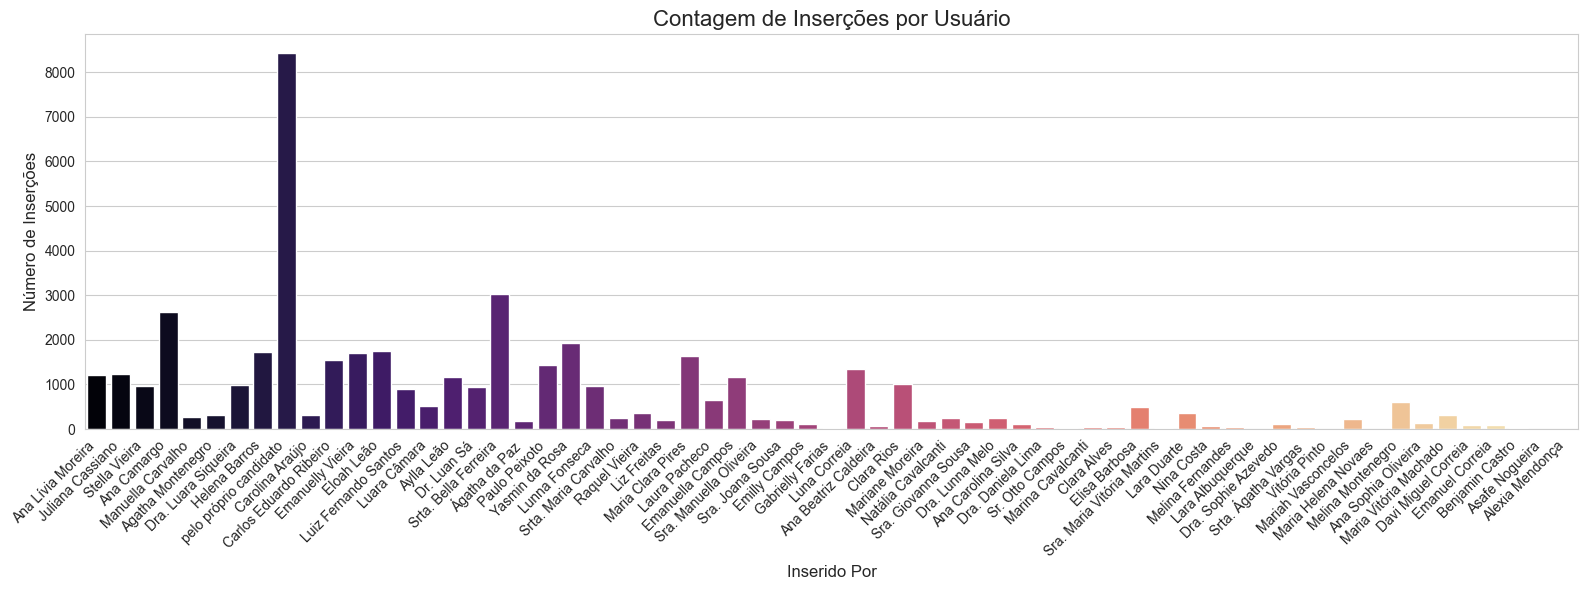

In [208]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))
sns.countplot(data=df_unificado_ml, x='inserido_por', palette='magma')
plt.title('Contagem de Inserções por Usuário', fontsize=16)
plt.xlabel('Inserido Por', fontsize=12)
plt.ylabel('Número de Inserções', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

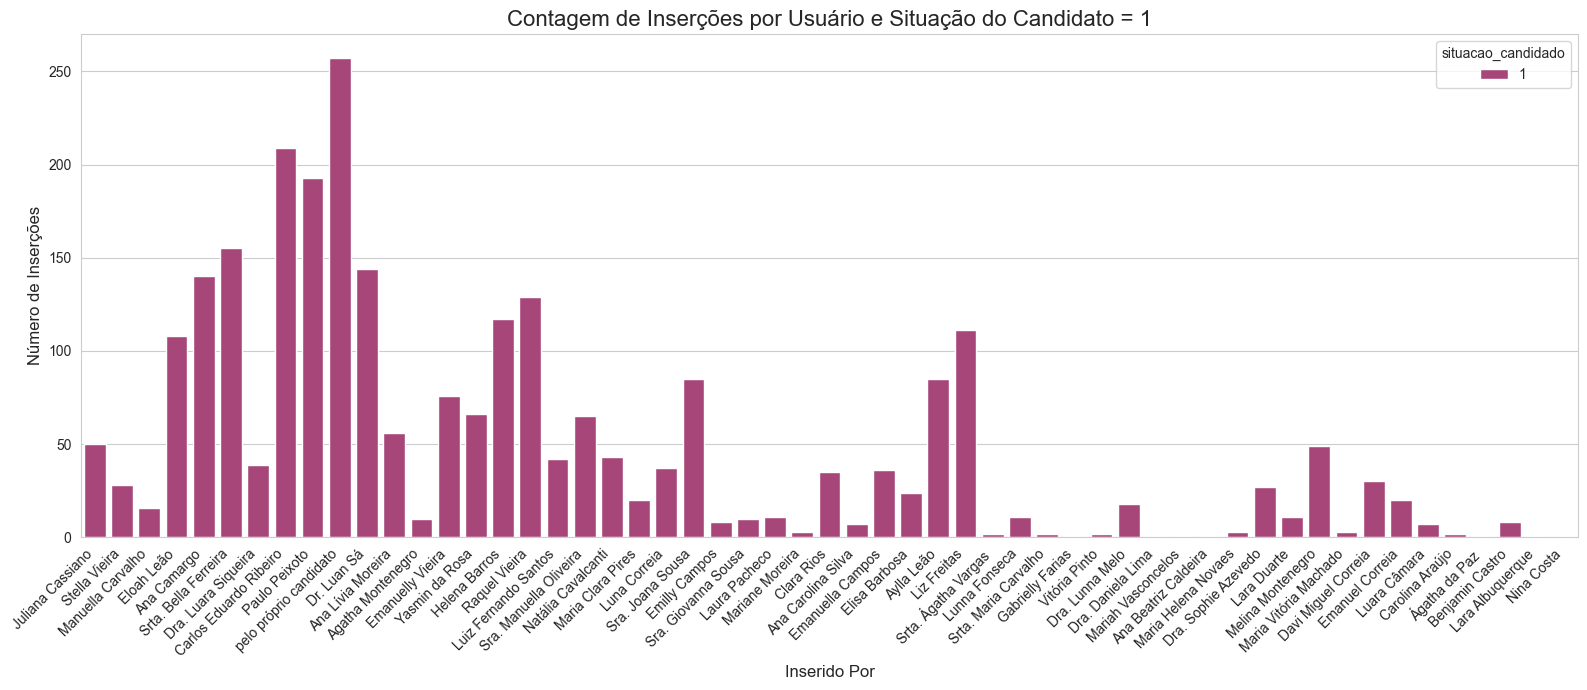

In [209]:
df_filtrado = df_unificado_ml[df_unificado_ml['situacao_candidado'] == 1]
plt.figure(figsize=(16, 7))
sns.countplot(data=df_filtrado, x='inserido_por', hue='situacao_candidado', palette='magma')
plt.title('Contagem de Inserções por Usuário e Situação do Candidato = 1', fontsize=16)
plt.xlabel('Inserido Por', fontsize=12)
plt.ylabel('Número de Inserções', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A correlação entra a contratação de um candidato e a pessoa que realizou o cadastro dele apesar de ser visível no gráfico, para ser uma correlação espúria

Uma correlação espúria ocorre quando duas variáveis mostram uma forte relação estatística (ou seja, elas se movem juntas, subindo e descendo em sincronia), mas essa relação não é explicada por uma conexão causal direta ou lógica entre elas. Geralmente, essa aparente conexão pode ser resultado de:

Pura Coincidência: As variáveis simplesmente se correlacionam por acaso, sem nenhum motivo subjacente.

Uma Terceira Variável Oculta (Variável de Confusão): Uma terceira variável, que não está sendo considerada na análise, influencia ambas as variáveis, fazendo com que pareçam estar diretamente relacionadas.

No nosso caso, parece ser coincidência, porém é algo que vale a pena ser investigado com a Decision.

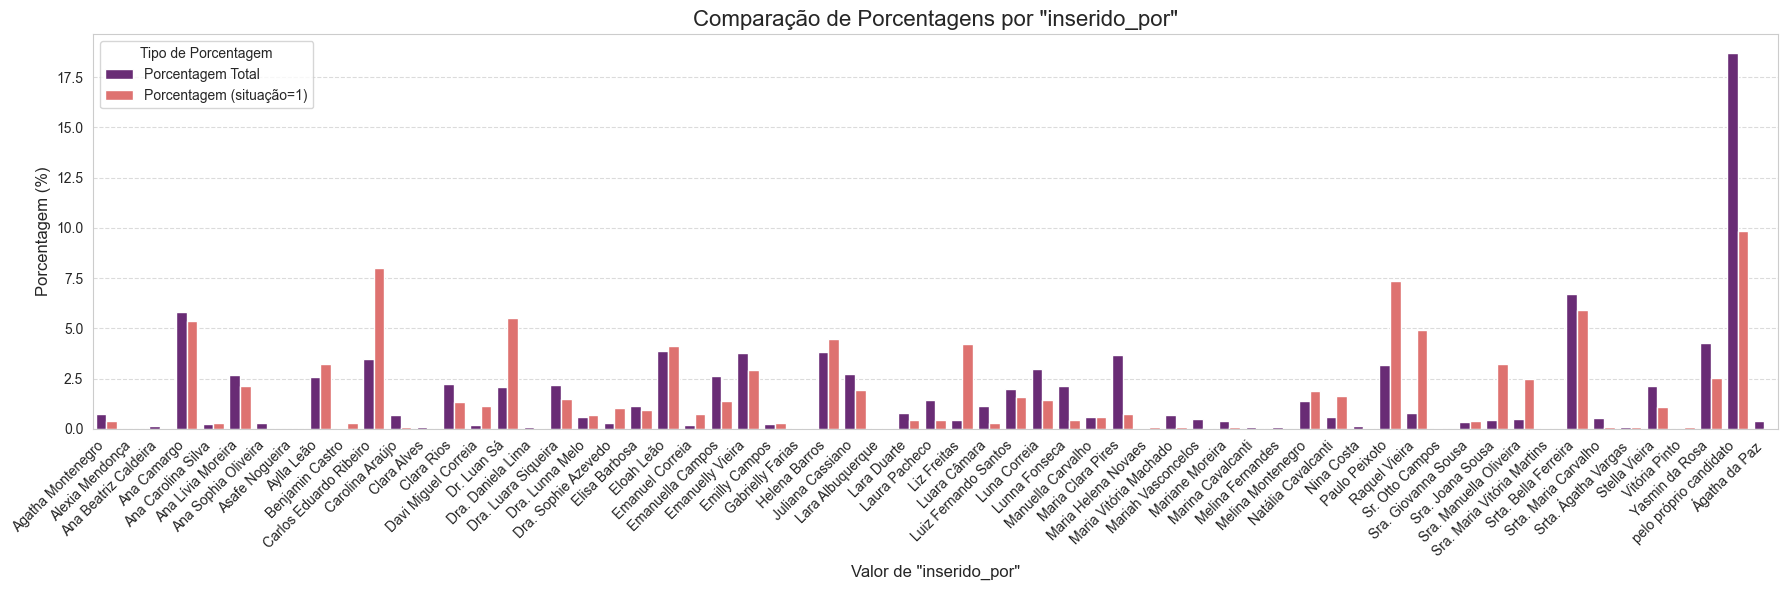

In [98]:
# 1. Calcular as porcentagens totais
porcentagens_totais = df_unificado_ml['inserido_por'].value_counts(normalize=True) * 100
df_porcentagens_totais = porcentagens_totais.reset_index()
df_porcentagens_totais.columns = ['inserido_por', 'Porcentagem Total']

# 2. Filtrar o DataFrame para situacao_candidato == 1
df_filtrado = df_unificado_ml[df_unificado_ml['situacao_candidado'] == 1]

# 3. Calcular as porcentagens quando situacao_candidato == 1
porcentagens_filtradas = df_filtrado['inserido_por'].value_counts(normalize=True) * 100
df_porcentagens_filtradas = porcentagens_filtradas.reset_index()
df_porcentagens_filtradas.columns = ['inserido_por', 'Porcentagem (situação=1)']

# 4. Unir os DataFrames de porcentagens
df_final = pd.merge(df_porcentagens_totais, df_porcentagens_filtradas, on='inserido_por', how='outer').fillna(0)

# 5. Organizar os dados para o Seaborn (formato "long")
df_melted = df_final.melt(id_vars='inserido_por', var_name='Tipo de Porcentagem', value_name='Porcentagem')

# 6. Gerar o gráfico de barras
plt.figure(figsize=(18, 6))
sns.barplot(data=df_melted, x='inserido_por', y='Porcentagem', hue='Tipo de Porcentagem', palette='magma')
plt.title('Comparação de Porcentagens por "inserido_por"', fontsize=16)
plt.xlabel('Valor de "inserido_por"', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Porcentagem')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [99]:
df_unificado_ml = df_unificado_ml.drop(columns=['inserido_por'])

df_unificado_ml

,modalidade,situacao_candidado,nivel_ingles_x,vaga_sap
0,NaN,0,NaN,Não
1,NaN,0,Intermediário,Não
2,NaN,1,Avançado,Não
3,NaN,0,NaN,Não
4,NaN,0,NaN,Não
...,...,...,...,...
56695,NaN,0,Avançado,NaN
56696,NaN,0,NaN,NaN
56698,NaN,0,NaN,NaN
56699,NaN,0,NaN,NaN


In [100]:
print(df_unificado_ml['modalidade'].unique())
print(df_unificado_ml['nivel_ingles_x'].unique())
print(df_unificado_ml['vaga_sap'].unique())

[nan 'CLT' 'Cooperado' 'PJ' 'CLT - Estratégico' 'Hunting']
[nan 'Intermediário' 'Avançado' 'Fluente' 'Básico' 'Nenhum']
['Não' nan 'Sim']


In [146]:
df_unificado_ml.reset_index(drop=True)
df_unificado_ml

,modalidade,situacao_candidado,nivel_ingles_x,vaga_sap
0,NaN,0,NaN,Não
1,NaN,0,Intermediário,Não
2,NaN,1,Avançado,Não
3,NaN,0,NaN,Não
4,NaN,0,NaN,Não
...,...,...,...,...
56695,NaN,0,Avançado,NaN
56696,NaN,0,NaN,NaN
56698,NaN,0,NaN,NaN
56699,NaN,0,NaN,NaN


Agora faremos a codificação da nossa base, seguindo os passos abaixo:

1. Coluna modalidade

modalidade = [nan 'CLT' 'Cooperado' 'PJ' 'CLT - Estratégico' 'Hunting']

Esta é uma variável categórica nominal, ou seja, não há uma ordem inerente entre as categorias (CLT não é "melhor" ou "maior" que PJ, por exemplo). Além disso, ela possui valores nan, portanto vamos utilizar o One-Hot Encoding

In [ ]:
# Instanciando o OneHotEncoder
ohe_modalidade = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit e transform na coluna 'modalidade'
encoded_modalidade = ohe_modalidade.fit_transform(df_unificado_ml[['modalidade']])

# Criando um DataFrame com as novas colunas codificadas
df_encoded_modalidade = pd.DataFrame(encoded_modalidade, columns=ohe_modalidade.get_feature_names_out(['modalidade']), index=df_unificado_ml.index)

# Juntando de volta ao DataFrame original (após remover a coluna original 'modalidade')
df_final_ml = pd.concat([df_unificado_ml.drop('modalidade', axis=1), df_encoded_modalidade], axis=1)

df_final_ml

Categorias aprendidas para modalidade: [array(['CLT', 'CLT - Estratégico', 'Cooperado', 'Hunting', 'PJ', nan],
      dtype=object)]


,situacao_candidado,nivel_ingles_x,vaga_sap,modalidade_CLT,modalidade_CLT - Estratégico,modalidade_Cooperado,modalidade_Hunting,modalidade_PJ,modalidade_nan
0,0,NaN,Não,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Intermediário,Não,0.0,0.0,0.0,0.0,0.0,1.0
2,1,Avançado,Não,0.0,0.0,0.0,0.0,0.0,1.0
3,0,NaN,Não,0.0,0.0,0.0,0.0,0.0,1.0
4,0,NaN,Não,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
56695,0,Avançado,NaN,0.0,0.0,0.0,0.0,0.0,1.0
56696,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0
56698,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0
56699,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0


2. Coluna nivel_ingles_x

nivel_ingles_x = [nan 'Intermediário' 'Avançado' 'Fluente' 'Básico' 'Nenhum']

Esta é uma variável categórica ordinal, pois há uma ordem clara entre as categorias (Nenhum < Básico < Intermediário < Avançado < Fluente). Manter essa ordem é importante para que o modelo possa aprender a relação. Ela também possui valores nan, portanto faremos um Ordinal Encoding com mapeamento manual.

In [ ]:
# Mapeamento manual para nível de inglês, incluindo None
ingles_mapping = {
    'Nenhum': 1,
    'Básico': 2,
    'Intermediário': 3,
    'Avançado': 4,
    'Fluente': 5,
    np.nan: 0
}

# Aplicando o mapeamento
df_final_ml['nivel_ingles_encoded'] = df_final_ml['nivel_ingles_x'].map(ingles_mapping)
df_final_ml = df_final_ml.drop(columns=['nivel_ingles_x'])

df_final_ml.head()


DataFrame após Ordinal Encoding de 'nivel_ingles_x':


,situacao_candidado,vaga_sap,modalidade_CLT,modalidade_CLT - Estratégico,modalidade_Cooperado,modalidade_Hunting,modalidade_PJ,modalidade_nan,nivel_ingles_encoded
0,0,Não,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0,Não,0.0,0.0,0.0,0.0,0.0,1.0,3
2,1,Não,0.0,0.0,0.0,0.0,0.0,1.0,4
3,0,Não,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0,Não,0.0,0.0,0.0,0.0,0.0,1.0,0


3. Coluna vaga_sap
vaga_sap = ['Não' nan 'Sim']

Esta é uma variável categórica binária (ou dicotômica), com apenas duas categorias principais (Sim e Não), além do nan, então realizaremos um mapeamento binário manual.

In [ ]:
# Opção 1: Mapeamento manual, tratando None como 'Não'
df_final_ml['vaga_sap_encoded'] = df_final_ml['vaga_sap'].map({'Sim': 1, 'Não': 0, np.nan: 0})
df_final_ml = df_final_ml.drop(columns=['vaga_sap'])

df_final_ml.head()


DataFrame após Mapeamento Binário de 'vaga_sap':


,situacao_candidado,modalidade_CLT,modalidade_CLT - Estratégico,modalidade_Cooperado,modalidade_Hunting,modalidade_PJ,modalidade_nan,nivel_ingles_encoded,vaga_sap_encoded
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
1,0,0.0,0.0,0.0,0.0,0.0,1.0,3,0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,4,0
3,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
4,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0


In [151]:
df_final_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54545 entries, 0 to 56700
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   situacao_candidado            54545 non-null  int64  
 1   modalidade_CLT                54545 non-null  float64
 2   modalidade_CLT - Estratégico  54545 non-null  float64
 3   modalidade_Cooperado          54545 non-null  float64
 4   modalidade_Hunting            54545 non-null  float64
 5   modalidade_PJ                 54545 non-null  float64
 6   modalidade_nan                54545 non-null  float64
 7   nivel_ingles_encoded          54545 non-null  int64  
 8   vaga_sap_encoded              54545 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 6.2 MB


# Treinamento dos modelos de Machine Learning

Com a codificação da nossa base finalizada, faremos agora a sepação da base entre treino e teste, para em seguida treinar e comparar os modelos.

In [152]:
X = df_final_ml.drop('situacao_candidado', axis=1)
y = df_final_ml['situacao_candidado']
y

0        0
1        0
2        1
3        0
4        0
        ..
56695    0
56696    0
56698    0
56699    0
56700    0
Name: situacao_candidado, Length: 54545, dtype: int64

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [154]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(43636, 8)
(43636,)
(10909, 8)
(10909,)


Como nossos dados estão bastante desbalanceados, com a classe majoritária (0) representando aproximadamente 95% das 55.000 linhas, e a classe minoritária (1) apenas 5%. Essa disparidade pode levar o modelo a ter um desempenho ruim na previsão da classe minoritária, já que ele pode aprender a classificar a maioria dos exemplos como 0, obtendo uma alta acurácia geral, mas falhando miseravelmente em identificar os casos de interesse (a classe 1). 

Para resolver esse problema, trabalhararemos com o método Oversampling, usando a biblioteca SMOTE

In [ ]:
# Instanciando SMOTE
smote = SMOTE(random_state=42)

# Aplicando SMOTE apenas nos dados de treino
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Distribuição das classes no conjunto de treino após SMOTE: {Counter(y_train_smote)}")

Distribuição das classes no conjunto de treino após SMOTE: Counter({0: 41076, 1: 41076})


In [157]:
results = {}

# Função auxiliar para treinar e avaliar modelos
def train_and_evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\nTreinando: {name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Coletando métricas para a classe minoritária (classe 1)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    print(f"--- {name} Relatório de Classificação ---")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC Score: {roc_auc:.4f}")

    results[name] = {
        'Precision (Classe 1)': precision,
        'Recall (Classe 1)': recall,
        'F1-Score (Classe 1)': f1,
        'AUC-ROC': roc_auc
    }

1. Regressão Logística

In [ ]:
log_reg_model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
train_and_evaluate_model("Regressão Logística", log_reg_model, X_train_smote, y_train_smote, X_test, y_test)


Treinando: Regressão Logística...
--- Regressão Logística Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10269
           1       0.57      0.28      0.37       640

    accuracy                           0.95     10909
   macro avg       0.76      0.63      0.67     10909
weighted avg       0.93      0.95      0.94     10909

AUC-ROC Score: 0.6766


2. Árvore de Decisão

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
train_and_evaluate_model("Árvore de Decisão", dt_model, X_train_smote, y_train_smote, X_test, y_test)


Treinando: Árvore de Decisão...
--- Árvore de Decisão Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10269
           1       0.57      0.28      0.37       640

    accuracy                           0.95     10909
   macro avg       0.76      0.63      0.67     10909
weighted avg       0.93      0.95      0.94     10909

AUC-ROC Score: 0.6733


3. Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
train_and_evaluate_model("Random Forest", rf_model, X_train_smote, y_train_smote, X_test, y_test)


Treinando: Random Forest...
--- Random Forest Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10269
           1       0.57      0.28      0.37       640

    accuracy                           0.95     10909
   macro avg       0.76      0.63      0.67     10909
weighted avg       0.93      0.95      0.94     10909

AUC-ROC Score: 0.6736


4. Gradient Boosting

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)
train_and_evaluate_model("Gradient Boosting (GBM)", gb_model, X_train_smote, y_train_smote, X_test, y_test)


Treinando: Gradient Boosting (GBM)...
--- Gradient Boosting (GBM) Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10269
           1       0.57      0.28      0.37       640

    accuracy                           0.95     10909
   macro avg       0.76      0.63      0.67     10909
weighted avg       0.93      0.95      0.94     10909

AUC-ROC Score: 0.6733


5. XGBoost

In [ ]:
neg_count = Counter(y_train_smote)[0]
pos_count = Counter(y_train_smote)[1]
scale_pos_weight_value = neg_count / pos_count
print(f"scale_pos_weight para XGBoost: {scale_pos_weight_value:.2f}")

xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight_value)
train_and_evaluate_model("XGBoost", xgb_model, X_train_smote, y_train_smote, X_test, y_test)

scale_pos_weight para XGBoost: 1.00

Treinando: XGBoost...
--- XGBoost Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10269
           1       0.57      0.28      0.37       640

    accuracy                           0.95     10909
   macro avg       0.76      0.63      0.67     10909
weighted avg       0.93      0.95      0.94     10909

AUC-ROC Score: 0.6748


c:\Users\joao1\Downloads\FIAP - Datathon - Fase 5\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:33:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


6. Support Vector Machine (SVC)

In [ ]:
svc_model = SVC(random_state=42, probability=True, class_weight='balanced')
train_and_evaluate_model("Support Vector Machine (SVC)", svc_model, X_train_smote, y_train_smote, X_test, y_test)


Treinando: Support Vector Machine (SVC)...
--- Support Vector Machine (SVC) Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10269
           1       0.57      0.28      0.37       640

    accuracy                           0.95     10909
   macro avg       0.76      0.63      0.67     10909
weighted avg       0.93      0.95      0.94     10909

AUC-ROC Score: 0.6535


Agora temos a nossa tabela Comparativa de Resultados, onde utilizamos as métricas abaixo:

F1-Score (Classe 1): Modelos com um F1-Score alto para a classe 1 indicam um bom equilíbrio entre Precisão e Recall.

Recall (Classe 1): Se o principal objetivo é garantir que você não perca (detecte) o máximo possível de casos da classe minoritária, então um Recall alto é crucial, mesmo que a Precisão seja um pouco menor.

Precisão (Classe 1): Se o custo de um falso positivo é muito alto, então um Precisão alta é mais importante.

AUC-ROC: Uma métrica geral do desempenho do classificador, independente do limiar. Um AUC-ROC mais alto significa que o modelo é melhor em distinguir entre as classes.

In [ ]:
print("\n--- Tabela Comparativa de Desempenho dos Modelos ---")
results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df.round(4))


--- Tabela Comparativa de Desempenho dos Modelos ---
                              Precision (Classe 1)  Recall (Classe 1)  \
Regressão Logística                         0.5683             0.2797   
Árvore de Decisão                           0.5673             0.2766   
Random Forest                               0.5669             0.2781   
Gradient Boosting (GBM)                     0.5669             0.2781   
XGBoost                                     0.5683             0.2797   
Support Vector Machine (SVC)                0.5683             0.2797   

                              F1-Score (Classe 1)  AUC-ROC  
Regressão Logística                        0.3749   0.6766  
Árvore de Decisão                          0.3718   0.6733  
Random Forest                              0.3732   0.6736  
Gradient Boosting (GBM)                    0.3732   0.6733  
XGBoost                                    0.3749   0.6748  
Support Vector Machine (SVC)               0.3749   0.6535  


Podemos ver que a regressão logística foi melhor nos 4 indicadores, então é o nosso melhor modelo

In [167]:
# Exportar o modelo treinado
filename_model = 'regressao_logistica_model.joblib'
joblib.dump(log_reg_model, filename_model)
print(f"Modelo exportado com sucesso para: {filename_model}")

# Exportar o OneHotEncoder
filename_encoder = 'one_hot_encoder_modalidade.joblib'
joblib.dump(ohe_modalidade, filename_encoder)
print(f"OneHotEncoder exportado com sucesso para: {filename_encoder}")

# Exportar a lista da ORDEM DAS COLUNAS de X_train
feature_columns_order = X.columns.tolist()
filename_features = 'model_features_order.joblib'
joblib.dump(feature_columns_order, filename_features)
print(f"Ordem das features exportada com sucesso para: {filename_features}")

Modelo exportado com sucesso para: regressao_logistica_model.joblib
OneHotEncoder exportado com sucesso para: one_hot_encoder_modalidade.joblib
Ordem das features exportada com sucesso para: model_features_order.joblib
